In [1]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split as tts
import torch
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy as dp
import time 
from IPython.display import clear_output
import matplotlib.pyplot as plt
import dataloader as dt



In [2]:
d = dt.Dataloader(200,1,activity=True)
#print(d.markers)
d.split(['Person (1)'])
d.load()
d.markers

{'good/Christeena Varghese/awindaRecording_20230217132921.csv': ['Christeena Varghese',
  23587],
 'good/Hanan Hujaily/awindaRecording_20230217125431.csv': ['Hanan Hujaily',
  54892],
 'good/Mahesh/awindaRecording_20230217123216.csv': ['Mahesh', 89947],
 'good/Nehmiya Shikur/awindaRecording_20230403172013.csv': ['Nehmiya Shikur',
  105038],
 'good/Nehmiya Shikur/awindaRecording_20230403172403.csv': ['Nehmiya Shikur',
  133289],
 'good/Nehmiya Shikur/awindaRecording_20230403173039.csv': ['Nehmiya Shikur',
  173056],
 'good/Nehmiya Shikur/awindaRecording_20230403173917.csv': ['Nehmiya Shikur',
  184465],
 'good/Phuoc Nguyen Pham/awindaRecording_20230403155903.csv': ['Phuoc Nguyen Pham',
  217386],
 'good/Phuoc Nguyen Pham/awindaRecording_20230403160632.csv': ['Phuoc Nguyen Pham',
  250797],
 'good/Vincent Wahyudi/awindaRecording_20230217130617.csv': ['Vincent Wahyudi',
  280634],
 'good/Viony Tengguna/awindaRecording_20230217131503.csv': ['Viony Tengguna',
  314919],
 'good/Zakriya/awind

In [3]:

d.binary_labels()
Data,_,labels,_,_,_,clabels,_,_,_,_,_,_,_ = d.fetch(10,200,Gyro=True,magnitude=False,scale=False)

Filtering Signal
Adding filtered Gyro sensor data


In [8]:
d.traindata

,AccelX_,AccelY_,AccelZ_,GyroX_,GyroY_,GyroZ_
0,9.289872,-1.564204,2.766708,0.007129,-0.009806,0.009130
1,9.284385,-1.589226,2.806836,0.007794,-0.008697,0.014319
2,9.292282,-1.586144,2.762597,0.006917,-0.019560,0.015803
3,9.334035,-1.621621,2.746737,0.007166,-0.015263,0.019416
4,9.330695,-1.642043,2.725036,0.006103,-0.009263,0.020654
...,...,...,...,...,...,...
788497,-9.307374,2.166623,2.809735,-0.008874,0.000781,0.008422
788498,-9.266236,2.201755,2.823325,-0.008235,-0.002207,0.005114
788499,-9.271585,2.143852,2.820396,-0.009172,-0.000662,0.005911
788500,-9.299368,2.164704,2.853740,-0.009622,-0.001169,0.007094


In [4]:
names = []
for i in range(len(d.trainfiles)):
    id0 = d.trainfiles[i].index("/",0,5)
    id1 = d.trainfiles[i].index("/",6)
    #print( d.trainfiles[i],id0,id1)
    if d.trainfiles[i][id0+1:id1] in names:
        names.append(d.trainfiles[i][id0+1:id1]+'_'+str(np.random.randint(0,100000)))
    else:
        names.append(d.trainfiles[i][id0+1:id1])
len(names)

30

In [5]:
indexes

NameError: name 'indexes' is not defined

In [6]:

indexes = [0]
alldata = {}
for keys in d.markers:
    indexes.append(d.markers[keys][1])

for i in range(len(indexes)-1):
    for s in range(4):
        minimums = {'accel_x':None,'accel_y':None,'accel_z':None,'gyro_x':None,'gyro_y':None,'gyro_z':None}
        maximums = {'accel_x':None,'accel_y':None,'accel_z':None,'gyro_x':None,'gyro_y':None,'gyro_z':None}
        mean = {'accel_x':None,'accel_y':None,'accel_z':None,'gyro_x':None,'gyro_y':None,'gyro_z':None}
        std = {'accel_x':None,'accel_y':None,'accel_z':None,'gyro_x':None,'gyro_y':None,'gyro_z':None}

        #print( indexes[i] + (s*722582), indexes[i+1]  + (s*722582))
        mins =  torch.min(Data[ indexes[i] + (s*722582) : indexes[i+1] + (s*722582) ],axis=0)[0].numpy()
        maxs =  torch.max(Data[ indexes[i] + (s*722582): indexes[i+1]  + (s*722582)],axis=0)[0].numpy()
        means =  torch.mean(Data[ indexes[i] + (s*722582) : indexes[i+1] + (s*722582) ],dim=1).numpy()
        stds =  torch.std(Data[ indexes[i] + (s*722582) : indexes[i+1] + (s*722582) ],dim=1).numpy()
        #print(means)
        for keys,j in zip(minimums,range(6)):
            minimums[keys]=mins[j]
            maximums[keys]=maxs[j]
            mean[keys]=means[j]
            std[keys]=stds[j]
        alldata[names[i]+' '+str(s)] = {'min':minimums,'max':maximums,'mean':mean,'std':std}
alldata

{'Christeena Varghese 0': {'min': {'accel_x': -2.0927858446150913,
   'accel_y': -6.081794894346026,
   'accel_z': -3.8406937940131747,
   'gyro_x': -4.928410398650375,
   'gyro_y': -3.2320013946679387,
   'gyro_z': -2.5133193351405523},
  'max': {'accel_x': 16.788389570526043,
   'accel_y': 2.991370271469134,
   'accel_z': 15.289327659317571,
   'gyro_x': 3.2043608396972174,
   'gyro_y': 5.844711634868931,
   'gyro_z': 1.1777178697706465},
  'mean': {'accel_x': 0.002290933731441801,
   'accel_y': 0.014962973778692509,
   'accel_z': 0.048937784203227835,
   'gyro_x': 0.11116896854099202,
   'gyro_y': 0.2029536294402823,
   'gyro_z': 0.3216558108172501},
  'std': {'accel_x': 0.005172202925518668,
   'accel_y': 0.033778152707608734,
   'accel_z': 0.1104861015309257,
   'gyro_x': 0.2510866814810476,
   'gyro_y': 0.4587234324400399,
   'gyro_z': 0.7276644788602534}},
 'Christeena Varghese 1': {'min': {'accel_x': -12.276192162223108,
   'accel_y': -10.21824810695913,
   'accel_z': -7.526047

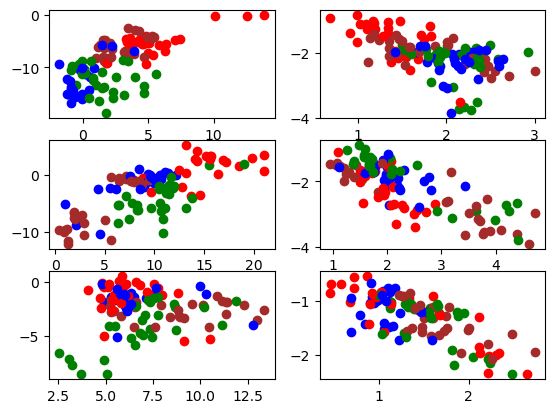

In [197]:
def plot(alldata,xaxis,yaxis):
    plt.plot(figsize=(15,15))
    ref = [j for k in range(28) for j in range(4)]
    color=['r','g','b','brown']
    for keys,i in zip(alldata,range(112)):
        plt.subplot(3,2,1)
        plt.scatter(alldata[keys][xaxis]['accel_x'],alldata[keys][yaxis]['accel_x'],c=color[ref[i]])
        plt.subplot(3,2,3)
        plt.scatter(alldata[keys][xaxis]['accel_y'],alldata[keys][yaxis]['accel_y'],c=color[ref[i]])
        plt.subplot(3,2,5)
        plt.scatter(alldata[keys][xaxis]['accel_z'],alldata[keys][yaxis]['accel_z'],c=color[ref[i]])
        plt.subplot(3,2,2)
        plt.scatter(alldata[keys][xaxis]['gyro_x'],alldata[keys][yaxis]['gyro_x'],c=color[ref[i]])
        plt.subplot(3,2,4)
        plt.scatter(alldata[keys][xaxis]['gyro_y'],alldata[keys][yaxis]['gyro_y'],c=color[ref[i]])
        plt.subplot(3,2,6)
        plt.scatter(alldata[keys][xaxis]['gyro_z'],alldata[keys][yaxis]['gyro_z'],c=color[ref[i]])

    #plt.legend(['hand','left pocket','right pocket','bacl pocket'])
    #plt.xlabel('minimums')
    #plt.ylabel('maximums')
    plt.show()
    
plot(alldata,'max','min')

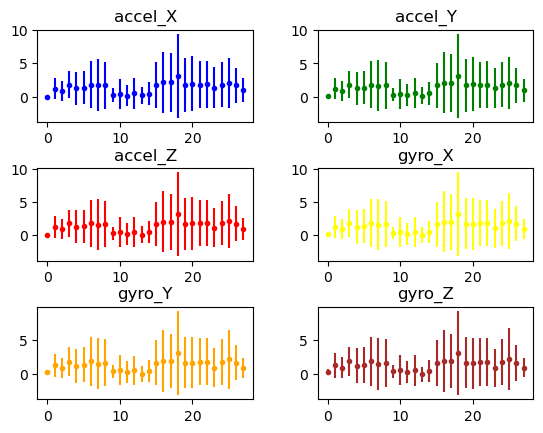

In [160]:
plt.xlabel('person number')
plt.ylabel('mean and std')
for keys,j in zip(alldata,range(len(names))):
    plt.subplot(3,2,1)
    plt.errorbar(j,alldata[keys]['mean']['accel_x'],alldata[keys]['std']['accel_x'],fmt='.',c='b')
    plt.title('accel_X')

    plt.subplot(3,2,2)
    plt.errorbar(j,alldata[keys]['mean']['accel_y'],alldata[keys]['std']['accel_y'],fmt='.',c='g')
    plt.title('accel_Y')

    plt.subplot(3,2,3)
    plt.errorbar(j,alldata[keys]['mean']['accel_z'],alldata[keys]['std']['accel_z'],fmt='.',c='r')
    plt.title('accel_Z')

    plt.subplot(3,2,4)
    plt.errorbar(j,alldata[keys]['mean']['gyro_x'],alldata[keys]['std']['gyro_x'],fmt='.',c='yellow')
    plt.title('gyro_X')

    plt.subplot(3,2,5)
    plt.errorbar(j,alldata[keys]['mean']['gyro_y'],alldata[keys]['std']['gyro_y'],fmt='.',c='orange')
    plt.title('gyro_Y')

    plt.subplot(3,2,6)
    plt.errorbar(j,alldata[keys]['mean']['gyro_z'],alldata[keys]['std']['gyro_z'],fmt='.',c='brown')
    plt.title('gyro_Z')

#plt.legend(['accel_x','accel_y','accel_z','gyro_x','gyro_y','gyro_z'])
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

## Labels

In [5]:
def create_boxplot_data(step_lengths):
    # Calculate Quartiles and IQR
    Q1 = np.percentile(step_lengths, 25)
    Q3 = np.percentile(step_lengths, 75)
    IQR = Q3 - Q1

    # Calculate Whisker Bounds
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Find Outliers (values beyond the whiskers)
    outliers = [x for x in step_lengths if x < lower_whisker or x > upper_whisker]

    return Q1, Q3, IQR, lower_whisker, upper_whisker, outliers

In [6]:
[each person,
each activity]
[mean_step_size,
std_step_size,
biggest_step_size,
smallest_step_size,
total_steps,
time_walked]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4038982722.py, line 1)

In [21]:
allLabels={}
allActivity = {}

indexes = [0]
for keys in d.markers:
    indexes.append(d.markers[keys][1])
    
Bcount = np.array([0,0,0])
all_counts = []
for idx in range(len(indexes)-1):
    lab = labels[ indexes[idx]: indexes[idx+1] ]
    totalsteps = torch.where(lab[:,0]==1)[0].shape[0]
    steps = lab[:,0]+lab[:,1]  #all steps in one column
    whe = torch.where(steps==1)[0] #indexes of all steps 
    midpoints = ((whe[1:]+whe[:-1])/2).int()[::2] # find the midpoint indexes of all steps. which is average of all values with jump of 1 
    lenth = ((whe[1:]-whe[:-1])).int()[::2] # find the length of all steps from midpoints.which is difference of all values with jump of 1
    activ = d.train_activity[indexes[idx]: indexes[idx+1]].to_numpy()
    count= [0,0,0]
    activ_id = [1,2,3]
    activ_midpoint= {1:[],2:[],3:[]}
    activ_lenth =  {1:[],2:[],3:[]}
    #print(idx,activ.shape,names[idx])
    for i in range(midpoints.shape[0]):
        for j in range(1,4):
            #print(i,activ_id[j])
            if activ[midpoints[i].item()]==activ_id[j-1]:
                count[j-1]+=1
                activ_midpoint[j].append(midpoints[i].item())
                activ_lenth[j].append(lenth[i].item())
    Bcount += np.array(count)
    
    all_counts.append(count)
    for j in range(1,4):
        if len(activ_lenth[j])==0:
            activ_lenth[j].append(0)
    #print(activ_lenth)
    mean_ss = [np.mean(activ_lenth[m])/80 for m in range(1,4)]
    std_ss = [np.std(activ_lenth[m])/80 for m in range(1,4)]
    bigest_ss = [np.max(activ_lenth[m])/80 for m in range(1,4)]
    smallest_ss = [np.min(activ_lenth[m])/80 for m in range(1,4)]
    allActivity[names[idx]] = pd.Series(activ.tolist())
    allLabels[names[idx]]=pd.Series(lenth.numpy().tolist())#{'total_steps':len(midpoints),
                          #'time_walked':len(lab)/80,
                          #'mean_ss':lenth.float().mean().tolist()/80,
                          #'std_ss':lenth.float().std().tolist()/80,
                         # 'bigest_step':lenth.max().item()/80,
                          #'smallest_step':lenth.min().item()/80,
                          #'all values':lenth.numpy().tolist()}
                           #'activity_count':count,
                          #'mean_ss_activity':mean_ss,
                          #'mean_ss_std':std_ss,
                          #'bigest_ss':bigest_ss,
                          #'smallest_ss':smallest_ss}



In [20]:
Bcount,Bcount.sum()

(array([11211,  1398,  1447]), 14056)

In [25]:
np.array(all_counts)

array([[425,  72, 102],
       [587,  80,  85],
       [554,  63,  61],
       [144,  48,  48],
       [380,  50,  63],
       [773,   0,   0],
       [170,  32,  16],
       [339,  82,  97],
       [555,  16,   0],
       [518,  52,  77],
       [550,  81,  80],
       [139,  80,  95],
       [232,   0,   0],
       [192,  77,  65],
       [187,  80,  80],
       [246,  32,  48],
       [428,   0,   0],
       [243,  65,  48],
       [289,  50,  48],
       [529,  33,  32],
       [168,  40,  37],
       [521,  36,  35],
       [530,  22,  40],
       [377,  40,  21],
       [478,  48,  48],
       [190,  32,  32],
       [214,  31,  49],
       [157,  16,   0],
       [426,  58,  58],
       [670,  82,  82]])

In [12]:
dfA = pd.DataFrame(allActivity)
dfA['Christeena Varghese'].unique()

array([ 0.,  1.,  3.,  2., nan])

In [30]:
df = pd.DataFrame(allLabels)
df.head(10)

,Christeena Varghese,Hanan Hujaily,Mahesh,Nehmiya Shikur,Nehmiya Shikur_51396,Nehmiya Shikur_27230,Nehmiya Shikur_28092,Phuoc Nguyen Pham,Phuoc Nguyen Pham_28429,Vincent Wahyudi,...,markus_42109,markus_57105,markus_42717,markus_42677,phillip,steffen,steffen_46589,steffen_66463,steffen_61205,steffen_52025
0,49.0,80.0,57.0,54.0,54.0,40.0,48.0,49.0,51.0,51.0,...,51.0,54.0,48.0,44.0,66.0,54.0,53.0,49.0,49.0,53
1,42.0,106.0,47.0,51.0,57.0,43.0,51.0,42.0,49.0,56.0,...,48.0,61.0,46.0,49.0,51.0,59.0,53.0,53.0,48.0,49
2,40.0,45.0,46.0,50.0,51.0,38.0,44.0,44.0,45.0,50.0,...,42.0,57.0,42.0,43.0,50.0,52.0,51.0,47.0,43.0,44
3,39.0,41.0,46.0,46.0,49.0,39.0,45.0,42.0,43.0,45.0,...,41.0,51.0,43.0,42.0,44.0,51.0,48.0,47.0,42.0,39
4,36.0,43.0,46.0,44.0,49.0,38.0,47.0,43.0,44.0,46.0,...,42.0,49.0,42.0,42.0,49.0,49.0,47.0,45.0,41.0,42
5,28.0,39.0,46.0,45.0,49.0,38.0,47.0,46.0,44.0,42.0,...,41.0,50.0,42.0,43.0,46.0,50.0,47.0,43.0,42.0,40
6,22.0,43.0,45.0,46.0,51.0,37.0,39.0,41.0,47.0,48.0,...,40.0,51.0,41.0,41.0,46.0,50.0,45.0,45.0,41.0,43
7,21.0,39.0,44.0,46.0,50.0,37.0,49.0,43.0,46.0,41.0,...,44.0,51.0,41.0,46.0,45.0,50.0,46.0,44.0,40.0,40
8,19.0,41.0,47.0,46.0,48.0,36.0,45.0,43.0,42.0,44.0,...,41.0,48.0,41.0,43.0,45.0,51.0,45.0,45.0,42.0,42
9,21.0,40.0,46.0,47.0,48.0,36.0,49.0,41.0,46.0,44.0,...,42.0,50.0,43.0,43.0,42.0,52.0,45.0,43.0,43.0,40


In [22]:
dic0 = {}
for name in names:
    print(allLabels[name][allActivity[name]==0])
    break
    

0      49
1      42
2      40
3      39
4      36
       ..
534    33
535    26
536    23
537    22
538    24
Length: 539, dtype: int64


In [31]:
names =df.keys()
nehmiya = names[3:7].tolist()
phoc = names[7:9].tolist()
zak = names[11:18].tolist()
markus = names[18:24].tolist()
stefen = names[25:31].tolist()
to_merge = {'all_nehmiya':nehmiya,'all_phoc':phoc,'all_zak':zak,'all_markus':markus,'all_stefen':stefen}
for nam,ar in to_merge.items():
    merg = df[ar].to_numpy()
    merged = np.concatenate(merg)
    df[nam] = pd.Series(merged)
    df.drop(columns=ar,axis=1,inplace=True)
df.head(10)

,Christeena Varghese,Hanan Hujaily,Mahesh,Vincent Wahyudi,Viony Tengguna,phillip,all_nehmiya,all_phoc,all_zak,all_markus,all_stefen
0,49.0,80.0,57.0,51.0,37.0,66.0,54.0,49.0,58.0,49.0,54.0
1,42.0,106.0,47.0,56.0,65.0,51.0,54.0,51.0,58.0,49.0,53.0
2,40.0,45.0,46.0,50.0,51.0,50.0,40.0,42.0,64.0,51.0,49.0
3,39.0,41.0,46.0,45.0,49.0,44.0,48.0,49.0,60.0,54.0,49.0
4,36.0,43.0,46.0,46.0,45.0,49.0,51.0,44.0,54.0,48.0,53.0
5,28.0,39.0,46.0,42.0,47.0,46.0,57.0,45.0,64.0,44.0,59.0
6,22.0,43.0,45.0,48.0,44.0,46.0,43.0,42.0,54.0,47.0,53.0
7,21.0,39.0,44.0,41.0,46.0,45.0,51.0,43.0,51.0,51.0,53.0
8,19.0,41.0,47.0,44.0,46.0,45.0,50.0,43.0,46.0,48.0,48.0
9,21.0,40.0,46.0,44.0,48.0,42.0,51.0,44.0,46.0,61.0,49.0


In [23]:
names

Index(['Christeena Varghese', 'Hanan Hujaily', 'Mahesh', 'Nehmiya Shikur',
       'Nehmiya Shikur_51396', 'Nehmiya Shikur_27230', 'Nehmiya Shikur_28092',
       'Phuoc Nguyen Pham', 'Phuoc Nguyen Pham_28429', 'Vincent Wahyudi',
       'Viony Tengguna', 'Zakriya', 'Zakriya_57661', 'Zakriya_5015',
       'Zakriya_93135', 'Zakriya_96831', 'Zakriya_37174', 'Zakriya_80474',
       'markus', 'markus_91214', 'markus_42109', 'markus_57105',
       'markus_42717', 'markus_42677', 'phillip', 'steffen', 'steffen_46589',
       'steffen_66463', 'steffen_61205', 'steffen_52025'],
      dtype='object')

In [32]:
df.to_csv('stats.csv')

In [46]:
print(df.mean(0).mean()/80)

0.5430335698925581


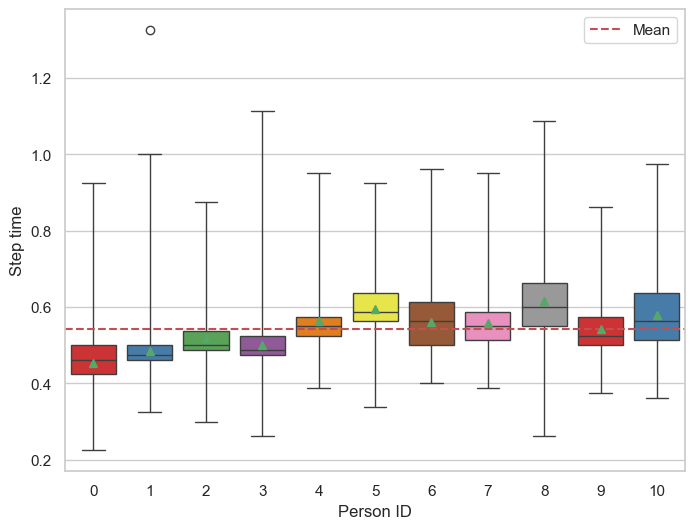

In [50]:
import seaborn as sns

data = {
    'Person 1': [50, 55, 60, 62, 63, 64, 65, 65, 65, 70, 70, 75, 76, 80, 85, 100],
    'Person 2': [55, 57, 59, 61, 62, 63, 65, 66, 68, 70, 72, 74, 75, 78, 80, 85],
    'Person 3': [48, 52, 54, 57, 58, 61, 63, 63, 64, 68, 69, 72, 75, 76, 80, 90]
}

# Create a Pandas DataFrame
#df = pd.DataFrame(data)

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))

sns.set(style="whitegrid")
g = sns.boxplot(data=df/80, palette="Set1",whis=15.0,showmeans=True)
plt.axhline(y=0.543, color='r', linestyle='--', label='Mean')
g.set_xticks(range(11))
g.set_xticklabels(range(11))
# Customize the plot

plt.xlabel("Person ID")
plt.ylabel("Step time")
plt.savefig('data_stats.pdf',bbox_inches='tight')
plt.legend()
plt.show()

In [49]:
#df[['Christeena Varghese','Hanan Hujaily','Nehmiya Shikur','Phuoc Nguyen Pham',
#   'Zakriya','Mahesh','Vincent Wahyudi','markus','steffen']].T.head(10)
df.head(25)

,Christeena Varghese,Hanan Hujaily,Mahesh,Nehmiya Shikur,Nehmiya Shikur_76339,Nehmiya Shikur_49803,Nehmiya Shikur_56010,Phuoc Nguyen Pham,Phuoc Nguyen Pham_59694,Vincent Wahyudi,...,markus_96696,markus_532,markus_16393,markus_46773,markus_44986,steffen,steffen_76617,steffen_97030,steffen_32624,steffen_48411
all values,"[49, 42, 40, 39, 36, 28, 22, 21, 19, 21, 19, 2...","[80, 106, 45, 41, 43, 39, 43, 39, 41, 40, 40, ...","[57, 47, 46, 46, 46, 46, 45, 44, 47, 46, 45, 4...","[54, 51, 50, 46, 44, 45, 46, 46, 46, 47, 44, 4...","[54, 57, 51, 49, 49, 49, 51, 50, 48, 48, 49, 5...","[40, 43, 38, 39, 38, 38, 37, 37, 36, 36, 37, 3...","[48, 51, 44, 45, 47, 47, 39, 49, 45, 49, 47, 5...","[49, 42, 44, 42, 43, 46, 41, 43, 43, 41, 42, 4...","[51, 49, 45, 43, 44, 44, 47, 46, 42, 46, 44, 4...","[51, 56, 50, 45, 46, 42, 48, 41, 44, 44, 46, 4...",...,"[49, 51, 44, 44, 44, 43, 42, 45, 41, 39, 39, 3...","[51, 48, 42, 41, 42, 41, 40, 44, 41, 42, 40, 4...","[54, 61, 57, 51, 49, 50, 51, 51, 48, 50, 47, 4...","[48, 46, 42, 43, 42, 42, 41, 41, 41, 43, 42, 4...","[44, 49, 43, 42, 42, 43, 41, 46, 43, 43, 40, 4...","[54, 59, 52, 51, 49, 50, 50, 50, 51, 52, 51, 5...","[53, 53, 51, 48, 47, 47, 45, 46, 45, 45, 44, 4...","[49, 53, 47, 47, 45, 43, 45, 44, 45, 43, 44, 4...","[49, 48, 43, 42, 41, 42, 41, 40, 42, 43, 42, 4...","[53, 49, 44, 39, 42, 40, 43, 40, 42, 40, 41, 4..."


In [51]:
a = {'a':1}
a['b']=2
a

{'a': 1, 'b': 2}

In [41]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(
    data=df,
    x=range(28), y="all values")
#g.despine(left=True)
#g.set_axis_labels("", "mean step size")
#g.legend.set_title("")

ValueError: Length of range vectors must match length of `data` when both are used, but `data` has length 1 and the vector passed to `x` has length 28.

In [39]:
df['Zakriya'].keys()

Index(['total_steps', 'time_walked', 'mean_ss', 'std_ss', 'bigest_step',
       'smallest_step', 'activity_count', 'mean_ss_activity', 'mean_ss_std',
       'bigest_ss', 'smallest_ss'],
      dtype='object')

In [26]:
def mean_comb(a,b,c,w1,w2,w3):
    above = (a*w1)+(b*w2)+(c*w3)
    down = w1+w2+w3
    return above/down

def std_comb(a,b,c,w1,w2,w3,u):
    above = (w1*(a**2+w1**2)) + (w2*(b**2+w2**2)) + (w3*(c**2+w3**2))
    down = w1+w2+w3
    ratio = (above/down) - (u**2)
    return np.sqrt(ratio)


In [31]:
df['Nehmiya Shikur']['total_steps']

245

In [29]:
names = ['Nehmiya Shikur','Nehmiya Shikur_63823','Nehmiya Shikur_5948']

nehmiya = {'total_steps':(df[names[0]]['total_steps']+df[names[1]]['total_steps']+df[names[2]]['total_steps'])/3,
                          'time_walked':(df[names[0]]['time_walked']+df[names[1]]['time_walked']+df[names[2]]['time_walked'] )/3,
                          'mean_ss':(df[names[0]]['time_walked']+df[names[1]]['time_walked']+df[names[2]]['time_walked']),
                          'std_ss':lenth.float().std().tolist()/80,
                          'bigest_step':lenth.max().item()/80,
                          'smallest_step':lenth.min().item()/80,
                           'activity_count':count,
                          'mean_ss_activity':mean_ss,
                          'mean_ss_std':std_ss,
                          'bigest_ss':bigest_ss,
                          'smallest_ss':smallest_ss}

a_False


In [33]:
total_steps= (df[names[0]]['total_steps']+df[names[1]]['total_steps']+df[names[2]]['total_steps'])/3
time_walked= (df[names[0]]['time_walked']+df[names[1]]['time_walked']+df[names[2]]['time_walked'] )/3
mean_ss= mean_comb(df[names[0]]['mean_ss'],df[names[1]]['mean_ss'],df[names[2]]['mean_ss'],
                   df[names[0]]['time_walked'],df[names[1]]['time_walked'],df[names[2]]['time_walked'] )
std_ss= std_comb(df[names[0]]['std_ss'],df[names[1]]['std_ss'],df[names[2]]['std_ss'],
                   df[names[0]]['time_walked'],df[names[1]]['time_walked'],df[names[2]]['time_walked'],mean_ss)
std_ss

388.4845041245646